# **Data Analysis of Used Cars**
<img src="https://storage.googleapis.com/kaggle-datasets-images/62920/121792/0b2d5fa44f4288eb760b7d83f9f1dfd2/dataset-cover.jpg?t=2018-10-10-16-28-48U" width="1000" height ="500">


- Dataset Used : [Used Cars Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)

- In this Project, We Analyse the the [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data) from Kaggle which has the Information about the used cars in United States.

- The Dataset has 4 lakh rows and 26 columns.

- To run this notebook, select "Run" > "Run on Colab" and connect your Google Drive account with Jovian. Make sure to use the GPU runtime if you plan on using a GPU.

## **Steps Followed while working with this project**

1. Talk about Exploratory Data Analysis(EDA)

2. Download the dataset from kaggle and lookup on the data what information does it contains.

3. Analyse the data and pick out more information about the data.

4. Select the Columns needed to use in the project.

5. Data Analyisis
  -  Checkout for the missimg or false values in the dataset and deal with these missing values.
  -  Perform different kinds of operations on the dataset to analyse all the rows and the columns.

6. Data Visualizatuion
  - Perform the Data Visualization to understand about the data in a more better way.

7. Summary and References.



 


## **Download the Dataset**

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files

In this project, we'll use data analysis tools like Numpy, Pandas, Matplotlib, Seaborn, Plotly, Opendatasets,and Folium so let's start with installing them.

In [1]:
# installing the required packages
!pip install pyyaml==5.4.1 pandas matplotlib==3.1.3 numpy seaborn plotly folium opendatasets jovian --upgrade --quiet

     |████████████████████████████████| 662 kB 4.0 MB/s 
     |████████████████████████████████| 12.2 MB 44.9 MB/s 
     |████████████████████████████████| 13.1 MB 57.3 MB/s 
     |████████████████████████████████| 17.1 MB 33 kB/s 
     |████████████████████████████████| 288 kB 76.4 MB/s 
     |████████████████████████████████| 15.3 MB 68.6 MB/s 
     |████████████████████████████████| 102 kB 10.0 MB/s 
     |████████████████████████████████| 68 kB 3.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


Let's begin by importing these libraries [matplotlib.pyplot](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), [Plotly](https://plotly.com/),  [Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Opendataset](https://github.com/JovianML/opendatasets)


In [2]:
# Import the required libraries
# used to upload the project on jovian
import jovian
# used to download a dataset from kaggle
import opendatasets as od
# Data analysis library in python
import pandas as pd
# numerical computing library
import numpy as np
#  for creating static visualizations in Python
import matplotlib
import matplotlib.pyplot as plt
# a high-level interface for drawing informative statistical graphics.
import seaborn as sns
#for creating interactive visualizations
import plotly.express as px
#Plotting geospatial data with Folium
import folium
# to create wordcloud in python
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="Used Cars Exploratoty Data Analysis")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [4]:
#Dataset Used in The Project

Dataset_Url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data/metadata'

In [5]:
od.download(Dataset_Url) # While Downloading the Dataset we need to give our Kaggle Credentials (username and key)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

Abort: ignored

The dataset has been downloaded and extracted.

In [ ]:
data_filename = './craigslist-carstrucks-data/vehicles.csv'

## **Dataset Preparation and Cleaning**

- Load the file using Pandas
- Look at some information about the data and the columns
- fix any missing or incorrect values

In [ ]:
%%time
used_car_df = pd.read_csv(data_filename) # using pandas to read the contents of the file and store that in used_car_df

CPU times: user 22.2 s, sys: 4.04 s, total: 26.3 s
Wall time: 28 s


As we can see it takes 32 seconds to read the entire dataset.

In [ ]:
jovian.commit()   # here this is going to save the notebook till here

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
used_car_df.shape # As we can see the data contains 426880 rows and 26 columns

(426880, 26)

In [ ]:
used_car_df.head()    # This is how our Dataframe looks like.

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
used_car_df.loc[426878] # Here we can check the complete information about any particular row in the dataframe

id                                                     7301591140
url             https://wyoming.craigslist.org/ctd/d/atlanta-2...
region                                                    wyoming
region_url                         https://wyoming.craigslist.org
price                                                       28990
year                                                       2018.0
manufacturer                                                lexus
model                                             es 350 sedan 4d
condition                                                    good
cylinders                                             6 cylinders
fuel                                                          gas
odometer                                                  30112.0
title_status                                                clean
transmission                                                other
VIN                                             58ABK1GG4JU103853
drive     

In [ ]:
used_car_df['image_url'].index     # .index will be used to check the starting and ending index with the increment.

RangeIndex(start=0, stop=426880, step=1)

In [ ]:
used_car_df.columns     # These are the columns we have in the dataset

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
len(used_car_df.columns)      # we can see that the dataset is having 26 number of columns through len function.

26

In [ ]:
len(used_car_df)           # these are the total number of rows in the dataset.

426880

In [ ]:
used_car_df.info()       # .info shows the total number of count of the dataset, the not null value and the datatype of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
used_car_df.describe()        # .describe method gives the following information about all the numeric columns in the dataset.

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
selected_columns = ['id','VIN','price','model','manufacturer','description','condition','cylinders','fuel','odometer','transmission','drive','type','paint_color','region','year','state','lat','long','posting_date']
# Here we select the columns that we would be using for our analysis

We see that by default float64 and integer64 bit datatypes are used, though the values that they have are not that large and can be stores in a 32bit datatype as well.


So let us convert these 64bit datatypes to 32bit so as to increase the speed and decrease the space that the datset holds.

In [ ]:
selected_dtypes = {
    'id': 'int16',
    'VIN': 'object',
    'price':'int16',
    'model': 'object',
    'manufacturer': 'object',
    'description': 'object',
    'condition': 'object',
    'cylinders' : 'object',
    'fuel' : 'object',
    'odometer' : 'float32',
    'transmission' : 'object',
    'drive':  'object',
    'type':  'object',
    'paint_color':  'object',
    'region':  'object',
    'year':    'float32',
    'state' :  'object',
    'lat' : 'float32',
    'long': 'float32',
}

Here we are now going to make a new dataframe with the selected columns and the new datatypes. 

In [ ]:
%%time
used_car_df = pd.read_csv(data_filename,
                          usecols= selected_columns,
                          dtype=selected_dtypes
                          )

CPU times: user 20.7 s, sys: 2.94 s, total: 23.6 s
Wall time: 24.2 s


Now we have finally read all the rows from the 'data_filename' with our selected columns and the selected data types.

In [ ]:
used_car_df.head() #This shows us the top 5 rows of our final dataframe

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
0,-26644,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,-29511,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,-7121,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,6952,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,-17762,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Let us now proceed ahead, to check for the duplicate and missing values :

In [ ]:
used_car_df.isnull().sum()        #isnull() function along with sum() gives a count of the missing values from each column

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
VIN             161042
drive           130567
type             92858
paint_color     130203
description         70
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Now, that gives us a count of total missing values from each columns. That is quite a lot, so let us see how we can handle these missing values in the best way to move ahead.


Below we first find the percentage of the missing values to understand the data in a better way.

In [ ]:
missing_percentages = used_car_df.isna().sum().sort_values(ascending = False)/ len(used_car_df)
missing_percentages

# so these are the percentage of the missing values

cylinders       0.416225
condition       0.407852
VIN             0.377254
drive           0.305863
paint_color     0.305011
type            0.217527
manufacturer    0.041337
long            0.015342
lat             0.015342
model           0.012362
odometer        0.010307
fuel            0.007058
transmission    0.005988
year            0.002823
description     0.000164
posting_date    0.000159
state           0.000000
region          0.000000
price           0.000000
id              0.000000
dtype: float64

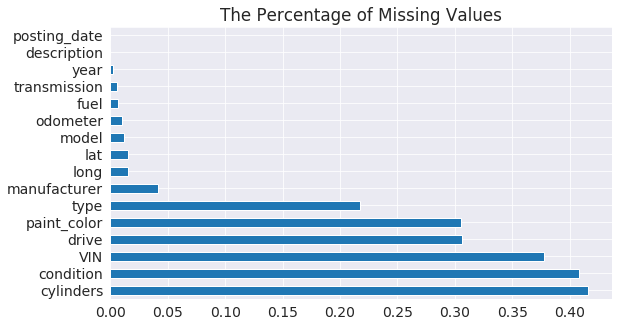

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh');
plt.title('The Percentage of Missing Values');

So above we can see the missing values for cylinder and condition is the highest and also we can see that the 'paint_color' and 'drive' are having almost same amount of missing value.


now we need to deal with all these missing values.


**We have the following options for dealing with missing values in numerical columns:**

1. Leave them as is, if they won't affect our analysis
2. Replace them with an average 
3. Replace them with some other fixed value
4. Remove the rows containing missing values
5. Use the values from other rows & columns to estimate the missing value (imputation)

Now, Let us check column by column for all the columns where we have missing values to see what we can do about them and handle them in the best way possible

Before Cleaning any particular column we will remove all the duplicate values from the DataFrame

In [ ]:
used_car_df.duplicated().sum()
# Here It shows that we do not have any duplicate row of data

0

The price column has negative value in it so we first make all the negative value as positive.

In [ ]:
used_car_df['price'] = used_car_df['price'].abs()       # abs function is going to make all the negative value as positive. 
used_car_df.sample(10)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
311192,-25147,bend,2150,2001.0,toyota,corolla,good,4 cylinders,gas,190795.0,manual,NaN,fwd,sedan,silver,Great little car and Great gas mileage!! Repl...,or,44.276699,-121.189598,2021-05-01T13:46:12-0700
269470,-11492,finger lakes,22946,2020.0,buick,enclave premium sport,good,6 cylinders,gas,1134.0,other,5GAEVBKW0LJ240959,NaN,SUV,black,Carvana is the safer way to buy a car During t...,ny,42.860001,-76.980003,2021-04-05T09:41:11-0400
63146,-24762,SF bay area,6500,2005.0,ford,mustang,good,6 cylinders,gas,78000.0,manual,NaN,NaN,convertible,green,Vendo un 2005 Ford Mustang V6. Esta en buenas...,ca,37.692734,-122.461479,2021-05-02T23:18:20-0700
276543,11336,new york city,24990,2013.0,bmw,1 series 135i convertible 2d,good,NaN,gas,27287.0,other,WBAUN7C52DVM28189,rwd,other,black,Carvana is the safer way to buy a car During t...,ny,40.840000,-73.870003,2021-05-01T15:51:12-0400
186485,12937,boston,6495,2009.0,honda,accord sdn,good,4 cylinders,gas,152000.0,automatic,1HGCP26369A077860,fwd,sedan,grey,"2009 Honda Accord Sdn 4dr I4 Auto LX - $6,495 ...",ma,42.305061,-71.055771,2021-05-01T15:54:14-0400
81325,11136,pueblo,24990,2017.0,audi,a3 prestige sedan 4d,good,NaN,gas,48823.0,other,WAUHUHFF4H1055345,fwd,sedan,black,Carvana is the safer way to buy a car During t...,co,33.786499,-84.445396,2021-04-18T04:30:45-0600
377118,-3651,killeen / temple / ft hood,10995,2014.0,chevrolet,impala limited,NaN,NaN,other,64673.0,automatic,NaN,NaN,sedan,NaN,2014 *Chevrolet* *Impala Limited* *LT* *SEDAN ...,tx,31.124479,-97.721092,2021-04-23T06:33:26-0500
239531,563,jacksonville,22499,2014.0,ram,pickup 1500 tradesman,excellent,8 cylinders,gas,97362.0,automatic,1C6RR7ST6ES193867,4wd,truck,NaN,2014 Ram Ram Pickup 1500 Tradesman 4x4Crew 4 x...,nc,35.920811,-78.545799,2021-05-02T19:05:10-0400
409742,-31408,seattle-tacoma,27900,2017.0,gmc,sierra 1500 base,NaN,6 cylinders,gas,51938.0,automatic,1GTR1LEH7HZ371958,rwd,NaN,NaN,Advantage Auto Direct ↪ Due to high demand we ...,wa,47.412045,-122.241112,2021-05-03T09:59:26-0700
16714,-18125,tucson,19952,2016.0,dodge,charger,NaN,6 cylinders,gas,46493.0,automatic,NaN,rwd,sedan,purple,SOLD!!! This Dodge Charger has just been Sol...,az,32.271328,-110.993713,2021-04-22T08:25:05-0700


As we can see that the price column now has all the values as positive.


Even in the above dataframe we can see that id column also contains negative values in it which is again not possible so we are going to make those negative values as positive.

In [ ]:
used_car_df['id'] = used_car_df['id'].abs()         # all the value in id column is converted to positive values and we can see that in the dataframe below.
used_car_df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
219248,16106,columbia / jeff city,25946,2020.0,nissan,370z sport touring coupe,good,6 cylinders,gas,683.0,other,JN1AZ4EH7LM821919,rwd,coupe,white,Carvana is the safer way to buy a car During t...,mo,38.950001,-92.320000,2021-05-04T15:11:37-0500
237095,19934,greensboro,0,2015.0,nissan,rogue,NaN,NaN,gas,92964.0,automatic,5N1AT2ML9FC840275,NaN,NaN,NaN,Hudson Auto Works Call Sales at 336-203-9211 ...,nc,36.082260,36.082260,2021-04-27T16:55:05-0400
182271,27759,baltimore,29546,2014.0,ford,super duty f-450 drw,good,10 cylinders,gas,42213.0,automatic,1FDUF4HY0EEB43392,4wd,truck,white,2014 Ford Super Duty F-450 DRW 12 FOOT LANDSCA...,md,40.468784,-74.281708,2021-04-23T12:58:36-0400
255675,22928,north jersey,18600,2015.0,mercedes-benz,c-class c300 sedan,NaN,4 cylinders,NaN,52580.0,automatic,55SWF4JB0FU070347,rwd,sedan,silver,***Call Us for more information at: 732-316-55...,nj,40.468651,-74.296989,2021-04-22T14:45:20-0400
172979,19392,louisville,27546,2012.0,ford,super duty f-550 drw,good,8 cylinders,diesel,108061.0,automatic,1FD0W5GT5CEC01732,rwd,NaN,black,2012 Ford Super Duty F-550 DRW CREW CAB 13' EN...,ky,40.468784,-74.281708,2021-04-23T12:45:32-0400
161865,22521,omaha / council bluffs,19995,NaN,NaN,Regal Sportback,NaN,4 cylinders,gas,16029.0,automatic,W04GP6SX3K1073281,fwd,sedan,silver,2019 *Buick* *Regal Sportback* 4dr Sedan Essen...,ia,41.229172,-95.852119,2021-04-24T09:13:37-0500
273267,8890,long island,3999,2004.0,hyundai,xc350l,NaN,NaN,gas,69000.0,automatic,NaN,NaN,NaN,NaN,2004 HYUNDAI XC350L ONLY 69K MILES!!! GREAT CA...,ny,40.677799,-73.396301,2021-04-27T14:02:14-0400
1590,24799,birmingham,0,2016.0,ram,3500 laramie 4x4,like new,6 cylinders,diesel,127000.0,automatic,NaN,4wd,truck,black,SELLING THIS ONE OWNER DELETED TUNED CUMMINS D...,al,34.188156,-86.851387,2021-04-08T11:15:34-0500
421881,12639,madison,24000,2016.0,volkswagen,touareg,excellent,6 cylinders,gas,78900.0,automatic,WVGEF7BP6HD000639,4wd,SUV,black,Beautiful condition - produced in Europe for t...,wi,43.506592,-88.705933,2021-04-06T10:53:04-0500
54306,9126,san diego,21991,2017.0,toyota,rav4,NaN,NaN,gas,35367.0,automatic,JTMWFREV7HJ142773,fwd,SUV,red,Toyota Carlsbad address: 5124 Paseo Del Nor...,ca,33.135052,-117.326721,2021-05-04T13:00:30-0700


In [ ]:
used_car_df[used_car_df['id']==0][:2]       # As we can see the id columns contains even the values a 0, so we are going to drop all the rows which contains the id value as 0.

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
13026,0,prescott,32541,2013.0,jeep,wrangler unlimited,excellent,6 cylinders,gas,55904.0,automatic,1C4BJWDG6DL517257,4wd,NaN,white,"2013 Jeep Wrangler Unlimited Sport; V-6, 4X4, ...",az,34.601898,-112.326401,2021-04-25T19:02:14-0700
33083,0,los angeles,25995,2015.0,audi,s4,excellent,6 cylinders,gas,59012.0,automatic,WAUVGAFR7DA000877,4wd,sedan,black,The 2015 Audi S4 has a timeless elegance to it...,ca,34.151001,-118.088898,2021-05-04T09:17:50-0700


In [ ]:
used_car_df = used_car_df[used_car_df['id'] != 0]         # we have removed all the rows in the id column which contains the value as 0.
used_car_df[:2]     

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
0,26644,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,29511,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN


We Will take the first column which has Nan Values (*According to the missing Percentage above*)

In [ ]:
used_car_df['cylinders'].isna().sum()       # So it will give us the total number of missing values of 'cylinders' column.

177675

In [ ]:
used_car_df['cylinders'].value_counts()         # It gives the total types inside the cylinder column.

6 cylinders     94167
4 cylinders     77641
8 cylinders     72061
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [ ]:
used_car_df.cylinders.fillna('unknown', inplace = True)         # here we have filled the nan values of the cyliunder column with unknown as it is very difficult to predict the number of cylinder for a particular car.

In [ ]:
skipped_unknown_in_cylinders = used_car_df[used_car_df['cylinders'] != 'unknown']       # here we skip all the unknown or nan value for the cylinder column to make our analysis easier.
skipped_unknown_in_cylinders[:10]      

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
27,17372,auburn,31946,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:18-0500
28,17498,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:08-0500
29,17267,auburn,25946,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:25-0500
30,23288,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T10:41:31-0500
31,17092,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,NaN,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.591999,-85.518898,2021-05-03T14:02:03-0500
32,30060,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,1GT220CG8CZ231238,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T13:41:25-0500
33,3251,auburn,30946,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,1GCVKREH6GZ228691,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T12:41:33-0500
34,22189,auburn,30536,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,NaN,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.601299,-85.443977,2021-05-03T12:12:59-0500
35,15337,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,1GCHTCE37G1186784,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T11:31:14-0500
36,22554,auburn,26946,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,other,1G1YR3DW3B5102190,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T07:50:35-0500


In [ ]:
used_car_df.cylinders.isna().sum()        # so now the cylinder column does not contains any nan value.

0

In [ ]:
used_car_df['cylinders'].value_counts()         # We can see that here there is no nan values for the cylinder column.

unknown         177675
6 cylinders      94167
4 cylinders      77641
8 cylinders      72061
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: cylinders, dtype: int64

In [ ]:
used_car_df.cylinders.unique()      # and these are all the unique values in the cylinder column

array(['unknown', '8 cylinders', '6 cylinders', '4 cylinders',
       '5 cylinders', 'other', '3 cylinders', '10 cylinders',
       '12 cylinders'], dtype=object)

In [ ]:
jovian.commit()       # we will save the changes till here

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


here we filled up the empty values of cylinders column with 'Unknown', and now we will go for the next column 'Condition'(According to the missing value percentage).

**Column 2:** Condition

In [ ]:
used_car_df.condition.isna().sum()        # Here we can see that the total number of missing values in the condition column.

174100

In [ ]:
used_car_df['condition'].value_counts()       # We will see what all are the types present for the condition and total number of count for each.

good         121456
excellent    101464
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [ ]:
used_car_df['condition'].fillna('good',inplace = True)          # We have filled all the missing values as good because we can see that in a second hand market the car does not have extreme good or extreme bad condition, it will be like some average car.

In [ ]:
used_car_df.condition.isna().sum()        # Here we can see that the total number of missing values in the condition column is now 0.

0

**Column 3:** Since Velhicle Identification Number is unique for all the vehicles so we cannot predict the VIN number for the vehicle which does not have VIN number

In [ ]:
used_car_df['VIN']

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
426875    1N4AA6AV6KC367801
426876    7JR102FKXLG042696
426877    1GYFZFR46LF088296
426878    58ABK1GG4JU103853
426879    WBA4J1C58KBM14708
Name: VIN, Length: 426873, dtype: object

In [ ]:
used_car_df['VIN'].isna().sum()         # This the total number of nan values which 'VIN' column contains

161040

In [ ]:
used_car_df.VIN.unique()        # These are all the unique values which 'VIN' columns contains

array([nan, '3GTP1VEC4EG551563', '1GCSCSE06AZ123805', ...,
       '2HGES15535H620534', '1FDWF37P64EA24868', 'SAJGX2749VCOO8376'],
      dtype=object)

In [ ]:
used_car_df.VIN.nunique()       # These are the total number of unique values which 'VIN' column contains

118261

In [ ]:
used_car_df['VIN'].value_counts()       # these are the 'VIN' numbers and their counts

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
5NMS2CAD0LH150152      1
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118261, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)         # By this we can see all the rows of a dataframe in the jupyter
print(used_car_df['VIN'].sample(30))

66904                   NaN
178247                  NaN
399474                  NaN
256846                  NaN
159205    4JGCB6FE2AA107829
154672                  NaN
385503    WBAJB1C56KB375682
67963     1G6DC1E36E0117352
112784                  NaN
362959                  NaN
181281    KMHHT6KJ6FU130185
31774     YV1MC67228J055178
245774    1FTEW1E56JFB81764
82465     1FT7W2BT9LED51058
424311                  NaN
352893                  NaN
393542    1FMJK2A53DEF44792
41893     3GCUYGED8LG400306
274376    1G4HP57276U159369
258679                  NaN
359980    3C7WRKBL1EG188715
345219                  NaN
153466                  NaN
43309     1N4AL3AP6FC103994
293252    1FTNW21L44EA70621
65053     2HGEJ8649YH572446
244613    1C4RJFAG7CC181913
211527                  NaN
166353    KM8NU73C27U018121
147405                  NaN
Name: VIN, dtype: object


In [ ]:
used_car_df.VIN.fillna('unknown',inplace = True)        # We have filled all the nan values as unknows to make our analysis easier and make some visulization to undersatnd better.

In [ ]:
skipped_unknown_in_VIN = used_car_df[used_car_df['VIN'] != 'unknown']       # we skip all the unknown values in the 'VIN' column and we can perform the data analysis even with this new dataframe and this is not going to make any in our original dataframe.
skipped_unknown_in_VIN.sample(30)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
310917,13200,bend,0,2018.0,ford,f-350 super duty long bed,good,8 cylinders,diesel,71190.0,automatic,1FT8W3BT5JEB00299,4wd,truck,NaN,Carz Planet STOCK #: 6967 💲 💲 FOR...,or,45.385979,-122.608299,2021-05-03T14:46:22-0700
152347,26820,indianapolis,26990,2018.0,alfa-romeo,romeo giulia ti sedan 4d,good,unknown,gas,37013.0,other,ZARFAECN6J7571762,rwd,sedan,black,Carvana is the safer way to buy a car During t...,in,39.770000,-86.139999,2021-04-22T10:50:58-0400
365261,32168,austin,32319,2018.0,jeep,grand cherokee limited automatic,good,unknown,gas,0.0,automatic,1C4RJEBG5JC339879,rwd,SUV,silver,2018 Jeep Grand Cherokee Limited Riata Ford87...,tx,30.346670,-97.560898,2021-04-27T08:02:43-0500
170722,6054,bowling green,10500,2014.0,ford,escape,excellent,unknown,gas,93120.0,automatic,1FMCU0GX5EUC05278,fwd,SUV,grey,Call ☏ (615) 992−3147 First Class Auto Sales ...,ky,36.292259,-86.733337,2021-04-07T09:00:17-0500
14337,24152,tucson,6999,2008.0,cadillac,dts,good,unknown,gas,140689.0,automatic,1G6KD57Y48U210551,NaN,sedan,NaN,2008 Cadillac DTS w/1SB Offered by: Tucson...,az,32.272629,-110.961342,2021-05-02T15:04:44-0700
402083,29871,bellingham,26999,2015.0,toyota,tundra 2wd truck,good,8 cylinders,gas,98532.0,automatic,5TFRY5F16FX180856,rwd,truck,custom,Joydrive: 253-201-0804 https://joydrive.com/...,wa,47.199100,-122.315102,2021-04-06T09:19:18-0700
373506,8428,el paso,23995,2016.0,jeep,grand cherokee,excellent,6 cylinders,gas,115396.0,automatic,1C4RJEBG3GC308008,rwd,SUV,white,Melendez Auto Sales Inc. 7725 Alameda Ave 7712...,tx,31.732128,-106.366043,2021-04-07T11:30:35-0600
424427,31552,milwaukee,23590,2014.0,mercedes-benz,m-class ml 350,good,6 cylinders,gas,60009.0,other,4JGDA5JB0EA272590,NaN,other,white,Carvana is the safer way to buy a car During t...,wi,43.060001,-87.959999,2021-04-20T07:20:44-0500
231866,21369,charlotte,4995,2001.0,toyota,sienna le,excellent,6 cylinders,gas,145417.0,automatic,4T3ZF13C81U384415,fwd,NaN,brown,I have a 2001 Toyota Sienna LE that runs and d...,nc,35.224983,-80.904678,2021-05-03T14:55:20-0400
123911,23267,atlanta,0,2008.0,dodge,nitro,good,unknown,gas,NaN,automatic,1D8GT28K88W274550,fwd,SUV,silver,2008 Dodge Nitro SXT 4dr SUV Offered by: D...,ga,33.991600,-84.152039,2021-04-29T12:30:11-0400


**Column 4: "Drive"**

In [ ]:
used_car_df['drive'].unique()     # These are all the unique value in the "Drive" column.

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [ ]:
used_car_df.drive.isna().sum()      # These are the total number of nan value in the "Drive" column.

130565

In [ ]:
used_car_df.drive.value_counts()      # we can see the unique values with their numbers.

4wd    131901
fwd    105515
rwd     58892
Name: drive, dtype: int64

In [ ]:
used_car_df['drive'].fillna('unknown', inplace = True)        # we have filled all the nan with unknown.


In [ ]:
used_car_df.sample(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
272320,16530,long island,14900,2005.0,mercedes-benz,benz slk 350,excellent,6 cylinders,gas,58200.0,automatic,WDBWK56F95F039654,rwd,convertible,black,2005 Black Diamond w/ Black Leather Interior M...,ny,40.947300,-74.295998,2021-05-02T09:01:43-0400
218062,7135,st cloud,25546,2018.0,ford,f150 supercrew cab xl,good,8 cylinders,other,41886.0,other,1FTEW1E5XJFA43340,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,mn,45.549999,-94.220001,2021-04-09T12:41:09-0500


This is how our dataframe looks like after doing the above corrections

**Column 5: "Paint_color"**

In [ ]:
used_car_df['paint_color'].unique()       # These are all the unique values of the colors we have in the dataset

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [ ]:
used_car_df['paint_color'].isna().sum()       # We will check for the count of all the nan values of "Paint_color" in the dataframe

130200

In [ ]:
len(used_car_df.paint_color)        # These are the total number of rows in the dataset as of now to perform the analysis.

426873

In [ ]:
used_car_df.paint_color.value_counts()        # These are the total number of counts for each color.

white     79283
black     62859
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [ ]:
used_car_df['paint_color'].fillna('white',inplace = True)         # We have filled the nan values with white color as most of the cars are having white color.

In [ ]:
used_car_df['paint_color'].isna().sum()           # Here we can see that now their is no nan values in the paint_color column 

0


**Column 6: "Type"**




In [ ]:
used_car_df['type'].isna().sum()        # Type Column Contains a lot of missing values and we are going to drop all these missing values.

92855

In [ ]:
used_car_df['type'].unique()        # These are all the unique values in the "Type" column.

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [ ]:
used_car_df.type.value_counts()

sedan          87055
SUV            77283
pickup         43510
truck          35278
other          22110
coupe          19204
hatchback      16597
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [ ]:
used_car_df.dropna(subset=['type'], inplace = True)       # Here we drop all the missing values.


**Column 7: "Manufacturer"**




In [ ]:
used_car_df.manufacturer.isna().sum()       # The manufacturer Columns contains these many number of nan values.

11160

In [ ]:
used_car_df.dropna(subset = ['manufacturer'], inplace = True)

In [ ]:

used_car_df.manufacturer.isna().sum()         # Here we can see that we have dropped all the missing values of the column "manufacturer".

0


**Column 8: "lat(latitude)"**




In [ ]:
used_car_df.lat.isna().sum()

6025

In [ ]:
used_car_df['lat'].fillna(37.0902,inplace = True)


**Column 9: "long(longitude)"**




In [ ]:
used_car_df.long.isna().sum()

6025

In [ ]:
used_car_df['long'].fillna(95.7129,inplace = True)

Here we can see that the (37.0902,95.7129) are the coordinates of USA, and we have our dataset of the United States so we have filles all the nan values of latitude and longitude with the coordinate values.

**Column 10: "Model"**


In [ ]:
used_car_df['model'].isna().sum()       # These are the total number of nan values in the "model" Column.

2908

In [ ]:
used_car_df['model'][:5]

27    sierra 1500 crew cab slt
28              silverado 1500
29         silverado 1500 crew
30        tundra double cab sr
31                   f-150 xlt
Name: model, dtype: object

In [ ]:
used_car_df.dropna(subset = ['model'], inplace = True)        # Here We have Dropped all the nan values.

In [ ]:
used_car_df['model'].isna().sum() 

0

**Column 11: "Odometer"**


In [ ]:
used_car_df['odometer'].isna().sum()

3301

In [ ]:
used_car_df['odometer'][:5]       # This is the sample that how the value of odometer looks like.

27     57923.0
28     71229.0
29     19160.0
30     41124.0
31    128000.0
Name: odometer, dtype: float32

In [ ]:
used_car_df['odometer'].describe()

count    3.166490e+05
mean     8.990916e+04
std      1.611355e+05
min      0.000000e+00
25%      3.470300e+04
50%      7.971900e+04
75%      1.270700e+05
max      1.000000e+07
Name: odometer, dtype: float64

Here We can see that the mean and median are almost equal and we can predict that the average kilometer of the car is around "89909" so we will fill this value at the place of nan.

In [ ]:
used_car_df['odometer'].fillna(used_car_df['odometer'].mean(), inplace = True)

In [ ]:
used_car_df['odometer'].isna().sum()        # So we can see that the nan values in tha odometer column is 0.

0

**Column 12: "Fuel"**


In [ ]:
used_car_df['fuel'].sample(3)

297584    gas
61043     gas
221539    gas
Name: fuel, dtype: object

In [ ]:
used_car_df['fuel'].isna().sum()        # As we can see that the missing values in the fuel columns are "1687" and below we can see how to deal with it.

1687

In [ ]:
used_car_df['fuel'].value_counts()        # These are the unique values with their value counts in the fuel column.

gas         266928
other        26934
diesel       18683
hybrid        4256
electric      1462
Name: fuel, dtype: int64

In [ ]:
used_car_df['fuel'].fillna("gas",inplace = True)          # Gas is the most common fuel that almost every car has so we will fill all the missing values with "gas".

In [ ]:
used_car_df.fuel.isna().sum()           # we have filled all the missing values in fuel column

0

**Column 13: "Transmission"**


In [ ]:
used_car_df['transmission'].isna().sum()        # As we can see that the missing values in the transmission columns are "1666" and below we can see how to deal with it.

1666

In [ ]:
used_car_df['transmission'].value_counts()          # These are the unique values with their value counts in the transmission column.

automatic    243717
other         59067
manual        15500
Name: transmission, dtype: int64

In [ ]:
used_car_df['transmission'].fillna("automatic",inplace = True)          # from the above value counts we can see that most of the cars are automatic so we fill all the missing values with automatic.

In [ ]:
used_car_df.transmission.isna().sum()           # we have filled all the missing values in transmission column

0

**Now we will see whether we missied any values or we have dealed with all the missing values**

In [ ]:
used_car_df.isna().sum()

id              0
region          0
price           0
year            6
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
description     1
state           0
lat             0
long            0
posting_date    0
dtype: int64

**We can see that we have deal with all the missing values in the DataFrame and now we have a cleaned Dataframe** 

In [ ]:
used_car_df[:10]          # we need to reset the index of the dataframe

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
27,17372,auburn,31946,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:18-0500
28,17498,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:08-0500
29,17267,auburn,25946,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:25-0500
30,23288,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T10:41:31-0500
31,17092,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,unknown,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.591999,-85.518898,2021-05-03T14:02:03-0500
32,30060,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,1GT220CG8CZ231238,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T13:41:25-0500
33,3251,auburn,30946,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,1GCVKREH6GZ228691,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T12:41:33-0500
34,22189,auburn,30536,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,unknown,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.601299,-85.443977,2021-05-03T12:12:59-0500
35,15337,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,1GCHTCE37G1186784,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T11:31:14-0500
36,22554,auburn,26946,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,other,1G1YR3DW3B5102190,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T07:50:35-0500


In [ ]:
used_car_df.reset_index(drop='index',inplace=True) #This is to reset the index starting from 0 to 319949
used_car_df[:10]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
0,17372,auburn,31946,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:18-0500
1,17498,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:08-0500
2,17267,auburn,25946,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:25-0500
3,23288,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T10:41:31-0500
4,17092,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,unknown,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.591999,-85.518898,2021-05-03T14:02:03-0500
5,30060,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,1GT220CG8CZ231238,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T13:41:25-0500
6,3251,auburn,30946,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,1GCVKREH6GZ228691,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T12:41:33-0500
7,22189,auburn,30536,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,unknown,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.601299,-85.443977,2021-05-03T12:12:59-0500
8,15337,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,1GCHTCE37G1186784,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T11:31:14-0500
9,22554,auburn,26946,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,other,1G1YR3DW3B5102190,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T07:50:35-0500


**Let us analyse the numeric columns and their statistics in our dataset.**

In [ ]:
used_car_df.describe()      # We can see that the price columns has the value as 0 which is not possible.

,id,price,year,odometer,lat,long
count,319950.000000,319950.000000,319944.000000,3.199500e+05,319950.000000,319950.000000
mean,16399.089880,14962.104216,2012.284180,8.990919e+04,38.542538,-91.577461
std,9425.080534,10060.013439,7.858463,1.603021e+05,5.816234,31.630089
min,-32768.000000,0.000000,1900.000000,0.000000e+00,-81.838234,-159.827728
25%,8261.250000,6299.000000,2010.000000,3.499600e+04,34.801449,-112.451775
50%,16429.000000,14200.000000,2014.000000,8.046500e+04,39.039688,-87.947800
75%,24527.000000,23995.000000,2017.000000,1.266340e+05,42.334496,-80.339828
max,32767.000000,32759.000000,2022.000000,1.000000e+07,82.252823,139.691696


In [ ]:
used_car_df['price'].value_counts().head()

0        24986
29990     2506
7995      2274
25990     2240
6995      2203
Name: price, dtype: int64

In [ ]:
used_car_df['price'].replace(to_replace = 0, value = used_car_df['price'].mean(), inplace=True)

In [ ]:
used_car_df['price'].value_counts().head()        # since the median and the mean are almost same we have filled the "0" value with the Average.

14962.104216    24986
29990.000000     2506
7995.000000      2274
25990.000000     2240
6995.000000      2203
Name: price, dtype: int64

In [ ]:
jovian.commit()   # jovian.commit() is used to save our work till here.

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## **Exploratory Analysis and Visualization**



Here, we explore the various columns in our data and understand the data better.

This will also help us to have answers to some interesting questions deliveing meaningful insights from the data for a car buyer in US.


![](https://i.imgur.com/KB5RWtQ.jpg)

In [ ]:
used_car_df.columns #columns proprty shows us the column names in the dataset

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'VIN', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [ ]:
used_car_df[:20]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
0,17372,auburn,31946.000000,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:18-0500
1,17498,auburn,22590.000000,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:08-0500
2,17267,auburn,25946.000000,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T12:31:25-0500
3,23288,auburn,30990.000000,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-04T10:41:31-0500
4,17092,auburn,15000.000000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,unknown,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.591999,-85.518898,2021-05-03T14:02:03-0500
5,30060,auburn,27990.000000,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,1GT220CG8CZ231238,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T13:41:25-0500
6,3251,auburn,30946.000000,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,1GCVKREH6GZ228691,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T12:41:33-0500
7,22189,auburn,30536.000000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,unknown,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.601299,-85.443977,2021-05-03T12:12:59-0500
8,15337,auburn,29990.000000,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,1GCHTCE37G1186784,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T11:31:14-0500
9,22554,auburn,26946.000000,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,other,1G1YR3DW3B5102190,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480003,2021-05-03T07:50:35-0500


**First we will analyse the Region where the highest number of Used Cars is Present.**



In [ ]:
# We Will first make a new dataframe where we can store the value counts of the regions, i.e It shows number of used car in a particular region.
Highest_used_car_df = used_car_df['region'].value_counts()
Highest_used_car_df[:30]

columbus                    2972
jacksonville                2950
salem                       2566
stockton                    2555
washington, DC              2545
norfolk / hampton roads     2503
sarasota-bradenton          2487
anchorage / mat-su          2464
spokane / coeur d'alene     2444
ft myers / SW florida       2440
reno / tahoe                2438
boston                      2402
tampa bay area              2400
eugene                      2392
long island                 2391
portland                    2382
seattle-tacoma              2351
baltimore                   2350
pittsburgh                  2331
tucson                      2327
kennewick-pasco-richland    2319
cincinnati                  2315
new york city               2312
orlando                     2310
north jersey                2310
boise                       2291
las vegas                   2280
sacramento                  2273
bend                        2267
fresno / madera             2266
Name: regi

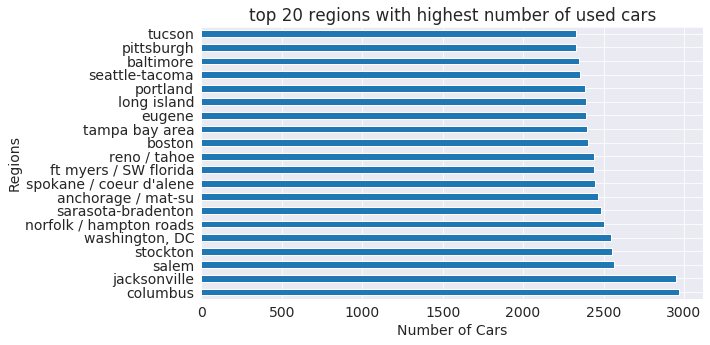

In [ ]:
Highest_used_car_df[:20].plot(kind = 'barh'); # Here we Can see the Top 20 regions where the highest used cars are present, as the dataframe is too large we have taken only top  20 values.
plt.title('top 20 regions with highest number of used cars');
plt.xlabel('Number of Cars')
plt.ylabel('Regions');

>Above Graph shows the Regions where the highest number of used cars are present and this information we can see through a bar graph above and also we can see that columbus is the reason where the used cars are the highest.

**Second we will check that which year has the highest number of Used Cars.**






In [ ]:
used_car_df['year'].value_counts()

2018.0    31017
2017.0    30391
2015.0    24864
2016.0    24055
2014.0    23790
2013.0    23662
2019.0    21467
2012.0    17392
2020.0    16550
2011.0    14957
2008.0    11727
2010.0    11265
2007.0    10189
2006.0     8614
2009.0     8536
2005.0     7203
2004.0     6063
2003.0     4821
2002.0     3610
2001.0     2851
2000.0     2212
1999.0     1935
2021.0     1599
1998.0     1183
1997.0     1052
1996.0      761
1995.0      665
1994.0      581
1993.0      428
1992.0      366
1991.0      345
1990.0      328
1989.0      314
1988.0      276
1987.0      271
1985.0      239
1986.0      237
1966.0      193
1984.0      186
1979.0      181
1968.0      181
1978.0      177
1973.0      170
1969.0      169
1972.0      144
1971.0      143
1965.0      143
1977.0      141
1980.0      130
1983.0      129
1982.0      128
1970.0      124
1967.0      115
1964.0      114
1981.0      107
1963.0      105
1974.0       98
1976.0       91
1975.0       80
1955.0       78
1957.0       72
1956.0       62
1962.0  

In [ ]:
used_cars_year = used_car_df['year'].value_counts()
used_cars_year

2018.0    31017
2017.0    30391
2015.0    24864
2016.0    24055
2014.0    23790
2013.0    23662
2019.0    21467
2012.0    17392
2020.0    16550
2011.0    14957
2008.0    11727
2010.0    11265
2007.0    10189
2006.0     8614
2009.0     8536
2005.0     7203
2004.0     6063
2003.0     4821
2002.0     3610
2001.0     2851
2000.0     2212
1999.0     1935
2021.0     1599
1998.0     1183
1997.0     1052
1996.0      761
1995.0      665
1994.0      581
1993.0      428
1992.0      366
1991.0      345
1990.0      328
1989.0      314
1988.0      276
1987.0      271
1985.0      239
1986.0      237
1966.0      193
1984.0      186
1979.0      181
1968.0      181
1978.0      177
1973.0      170
1969.0      169
1972.0      144
1971.0      143
1965.0      143
1977.0      141
1980.0      130
1983.0      129
1982.0      128
1970.0      124
1967.0      115
1964.0      114
1981.0      107
1963.0      105
1974.0       98
1976.0       91
1975.0       80
1955.0       78
1957.0       72
1956.0       62
1962.0  

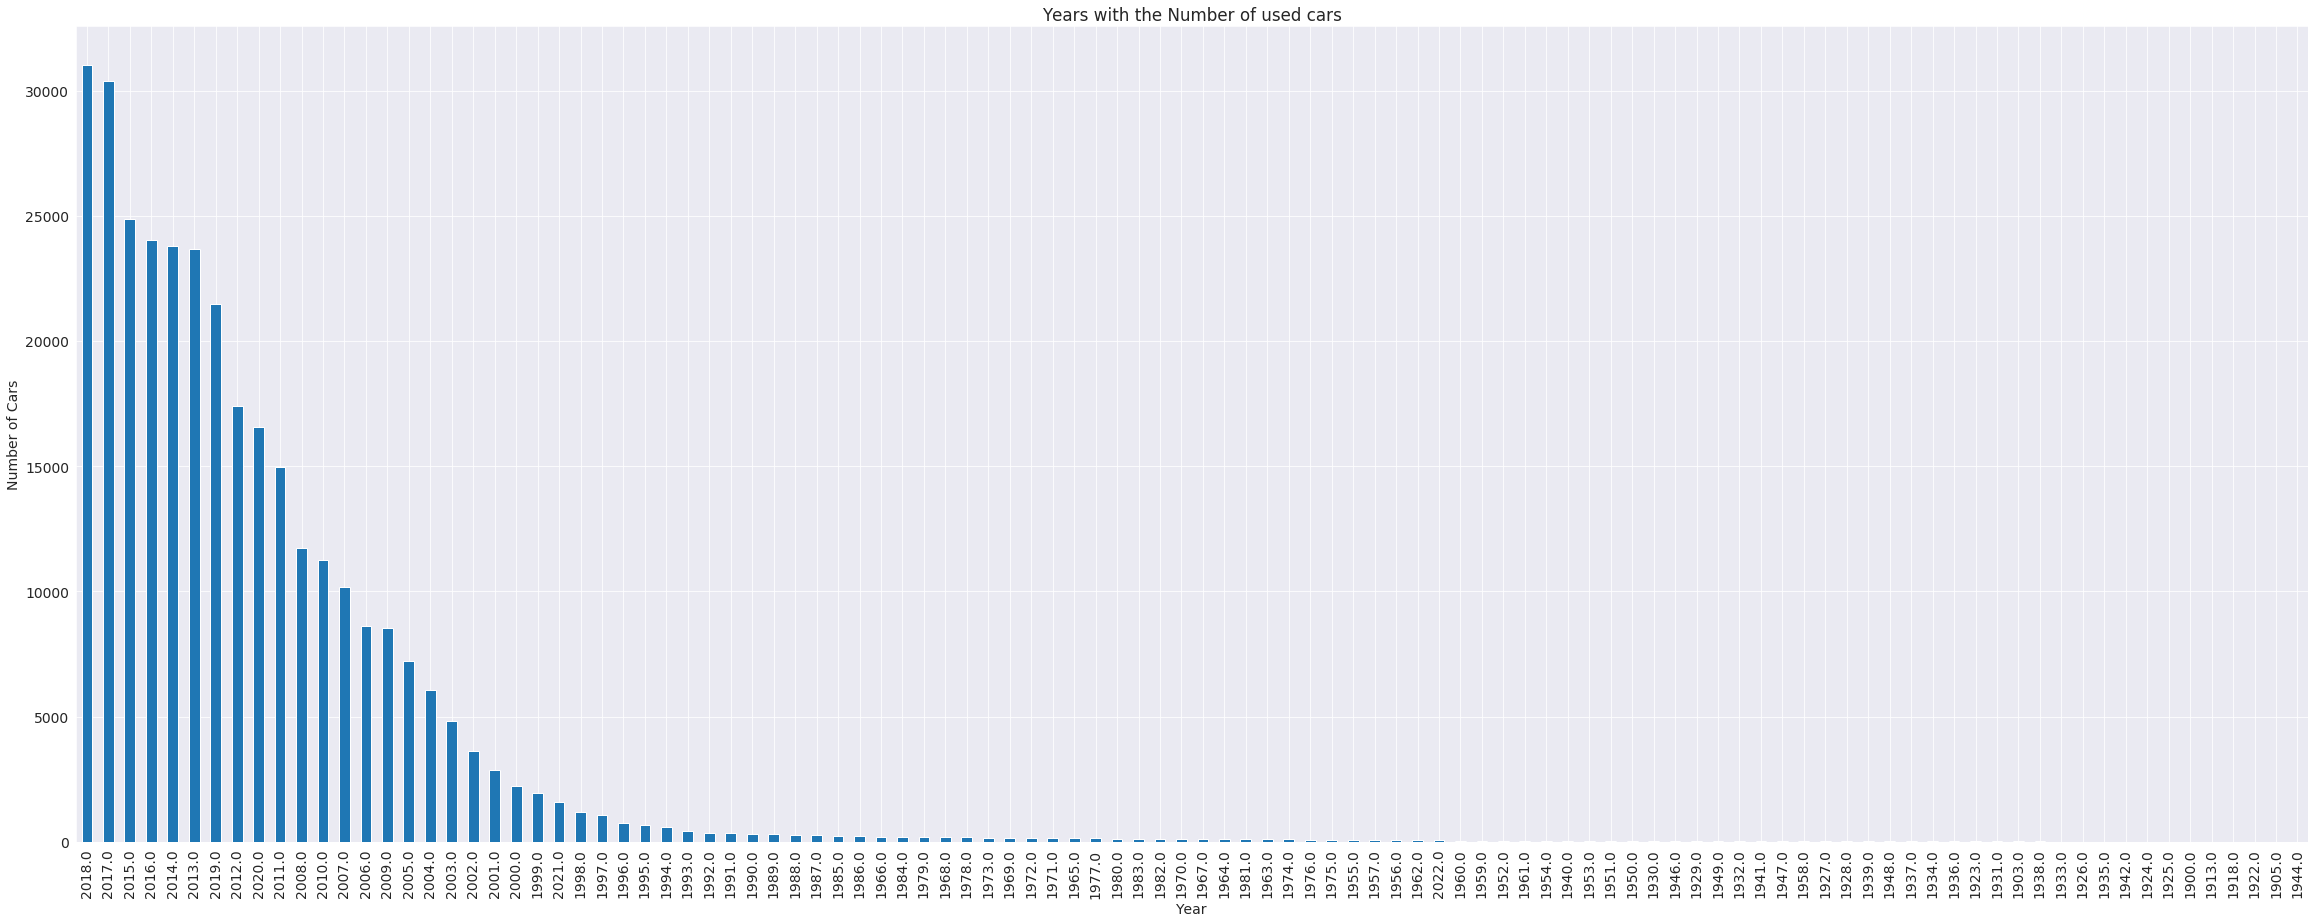

In [ ]:
used_cars_in_a_year = used_car_df['year'].value_counts()

plt.figure(figsize=(40, 15))
used_cars_in_a_year.plot(kind='bar')
plt.title('Years with the Number of used cars');
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

>We can see that "2018" is the year where the used cars are highest and even the 2017 is very close to 2018 in terms of number of cars but we can see their is a huge gap between 2000 and 2018, so can see that second hand car market is has increased.

**Third we will check the car manufacturing companies with total number of cars.**


In [ ]:
car_manufacture_companies = used_car_df['manufacturer'].value_counts()
car_manufacture_companies

ford               52379
chevrolet          40913
toyota             27593
honda              16904
nissan             14837
jeep               14794
ram                13778
gmc                12856
bmw                12584
dodge              10196
mercedes-benz       9929
hyundai             8292
volkswagen          7746
subaru              7403
lexus               7024
kia                 6755
audi                6726
cadillac            5569
acura               5351
chrysler            4547
mazda               4444
buick               4309
infiniti            4208
lincoln             3455
mitsubishi          2764
volvo               2710
mini                2064
jaguar              1682
rover               1547
pontiac             1481
porsche             1036
mercury              866
alfa-romeo           836
tesla                779
saturn               698
fiat                 662
harley-davidson       90
ferrari               70
datsun                35
aston-martin          19


In [ ]:
fig = px.scatter(car_manufacture_companies, title = 'Car manufacturer company with total number of cars')
fig.update_layout(yaxis_title = 'Number of Cars', xaxis_title = 'Car Company Name', showlegend=False)
fig.show()

> Above we can see the with the total number of cars they have in the second hand market and ford is highest among them and land rover has the lowest number of cars in the second hand market.

**Fourth we will check the types of fuel and their counts**


In [ ]:
fig = px.histogram(used_car_df, x="fuel",title = 'Types of Fuel and their counts')
fig.update_layout(yaxis_title = 'Number of Cars', xaxis_title = 'Fuel Type')
fig.show()

Above we can see the Number of car with the fuel they used and gas is highest among them and also we can see that second hand electric cars are very rare in the market so if someone want second hand electric car then it is very difficult for them to get the electric car.

## **Asking and Answering Questions**



Let us now ask and answer some interesting questions to further understand the Used Cars market in US.

![](https://scriptmag.com/.image/t_share/MTY3Mzc4OTI4MDk3MTA5NjE2/image-placeholder-title.jpg)

**These Are Some of Questions which we are going to answer :**

Q1 : which region is the highest producer of cars?

Q2 : how the second hand car market is increasing year by year?

Q3 : which manufacturer has the highest number of cars in Second hand market?

Q4 : what all are the types of cars present in the market, and which is highest among them?

Q5 : What all drive types of cars present?

Q6 : Location at Which highest Used Cars Present?

Q7 : What all are the colours present and which is is having highest among them?

Q8 : Total number of states and having highest and lowest number of car manufacturer?

Q9 : Number of Car With the Number of Cylinder?

Q10 : Condition of the car with the number of cars?

Q11 : Which Car Manufacturer has Highest odometer readings?

Q12 : which is the most top 10 expensive second hand car?

**Q1 :  which region is the highest producer of Second hand cars?**


In [ ]:
used_car_df['region'].value_counts().head()


columbus          2972
jacksonville      2950
salem             2566
stockton          2555
washington, DC    2545
Name: region, dtype: int64

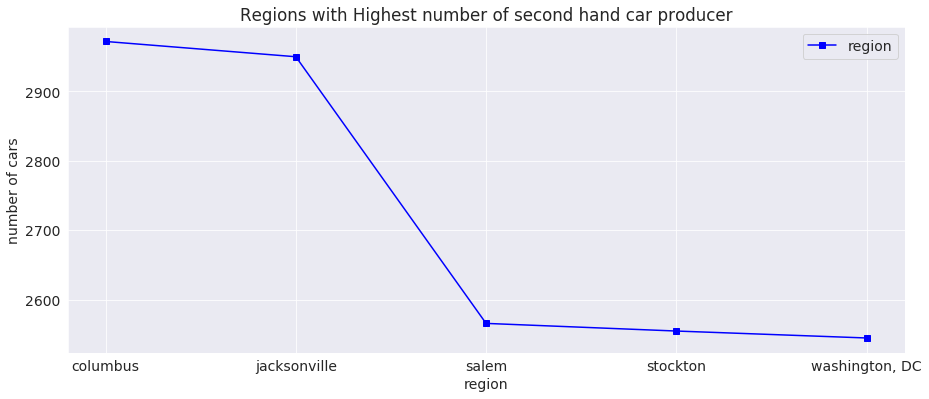

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(used_car_df['region'].value_counts().head(),'s-b')
plt.xlabel('region')
plt.ylabel('number of cars')
plt.title('Regions with Highest number of second hand car producer')
plt.legend(['region']);

As we can see above "Columbus" is the Region where the highest number of used car present and also these are the top five reasons where the highest used cars are present 

**Q2 : how the second hand car market is increasing year by year?**

In [ ]:
px.scatter(used_car_df.sample(1000),
           x='manufacturer',
           y='year', 
           title='Used Car Market Increases As The Year Passes',
           color = 'year')

Here we Can see that the second hand car market has increased gradually after the year 2000, before that only few car companies are having their second hand cars in the market.

**Q3 : which manufacturer has the highest number of cars in Second hand market?**

In [ ]:
highest_manufacturer = used_car_df['manufacturer'].value_counts().head(15)
highest_manufacturer

ford             52379
chevrolet        40913
toyota           27593
honda            16904
nissan           14837
jeep             14794
ram              13778
gmc              12856
bmw              12584
dodge            10196
mercedes-benz     9929
hyundai           8292
volkswagen        7746
subaru            7403
lexus             7024
Name: manufacturer, dtype: int64

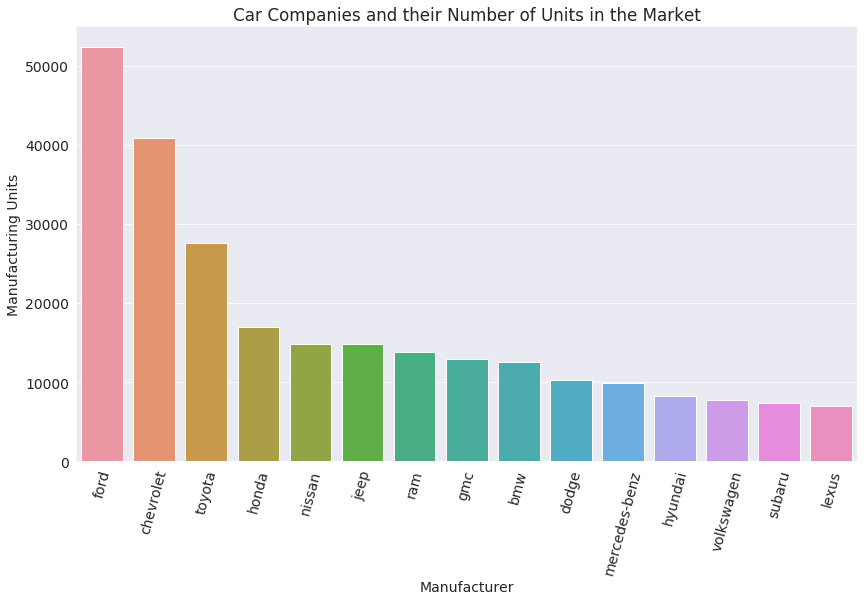

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=75)
plt.title('Car Companies and their Number of Units in the Market')
ax = sns.barplot(x=highest_manufacturer.index, y=highest_manufacturer)
ax.set(xlabel='Manufacturer', ylabel='Manufacturing Units');

Here We Used Seaborn and MatplotLib to Draw the Chart. And we can see that ford has the highest number of used cars in the market.




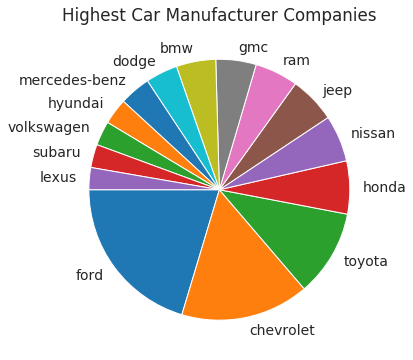

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Highest Car Manufacturer Companies')
plt.pie(highest_manufacturer, labels=highest_manufacturer.index, startangle=180);

We can also view the insights from a Pie Chart.

We Can see that ford has the highest number of used cars in the market.

**Q4 : what all are the types of cars present in the market, and which is highest among them?**

In [ ]:
px.histogram(used_car_df['type'], x="type", title='Types of Cars in the market')

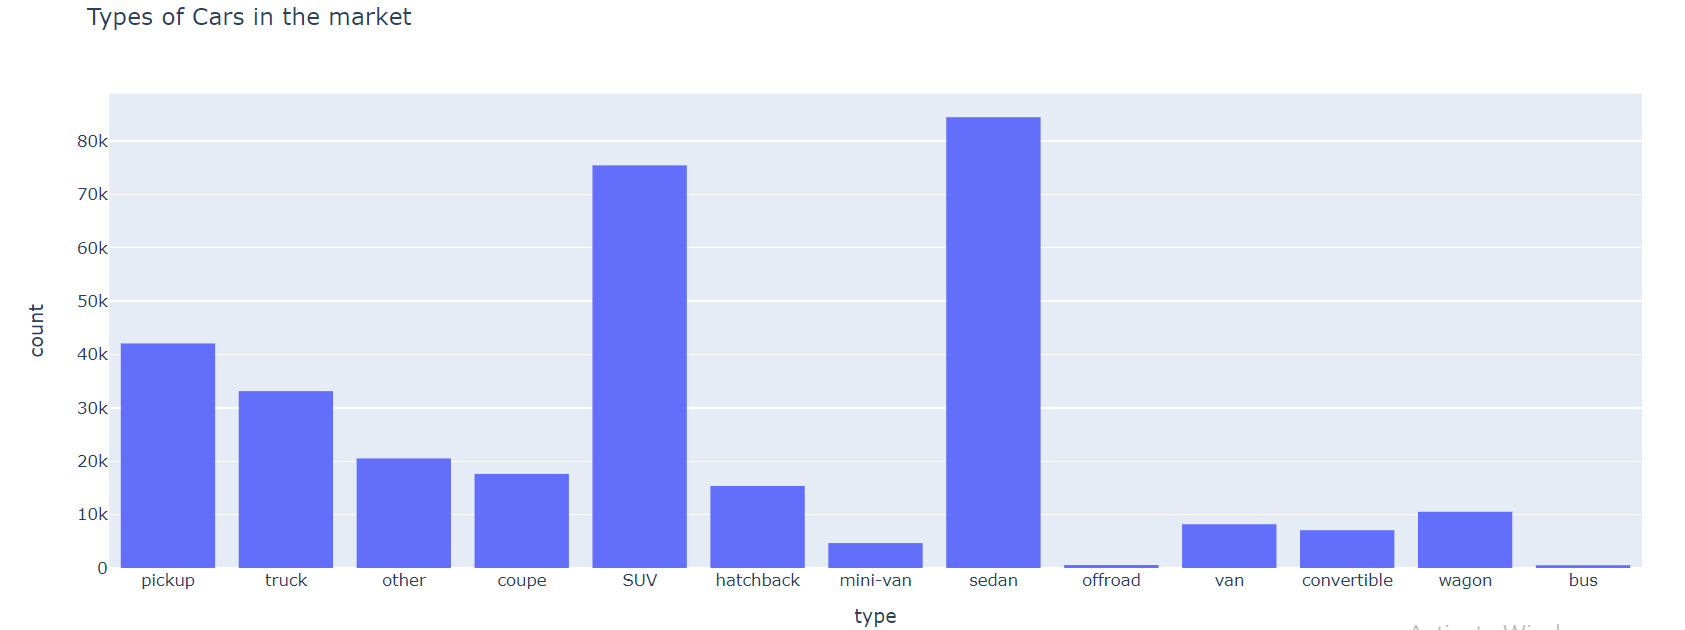

As we can see from the above graph all the types of the cars present in the  market and we can even see that SEDAN and the SUV are highest among them.

**Q5 : What all drive types of cars present?**

In [ ]:
Drive_types = used_car_df['drive'].value_counts()
Drive_types

4wd        112982
fwd         92057
unknown     67066
rwd         47845
Name: drive, dtype: int64

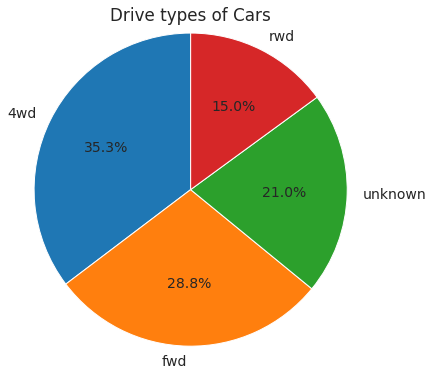

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Drive types of Cars')
plt.pie(Drive_types, labels=Drive_types.index,autopct='%1.1f%%' ,startangle=90,radius=1.2);

From this Pie chart we can see that 4wd cars are the heighest in the market rear wheel drive are the lowest but we even have some unknown values for which we don't know whether they are front wheel or rear wheel or 4 wheel drive, also we can see that front wheel cars are the highest after 4 wheel drive cars, so we get the insight that people are most frequently to buy a four wheel drive car.

**Q6 : Location at Which highest Used Cars Present?**

In [ ]:
import folium
from folium.plugins import HeatMap
location = list(zip(list(used_car_df.lat),list(used_car_df.long)));
m = folium.Map(location=[40.7128,-74.0060],zoom_start = 15)
HeatMap(location[:313422]).add_to(m)
m


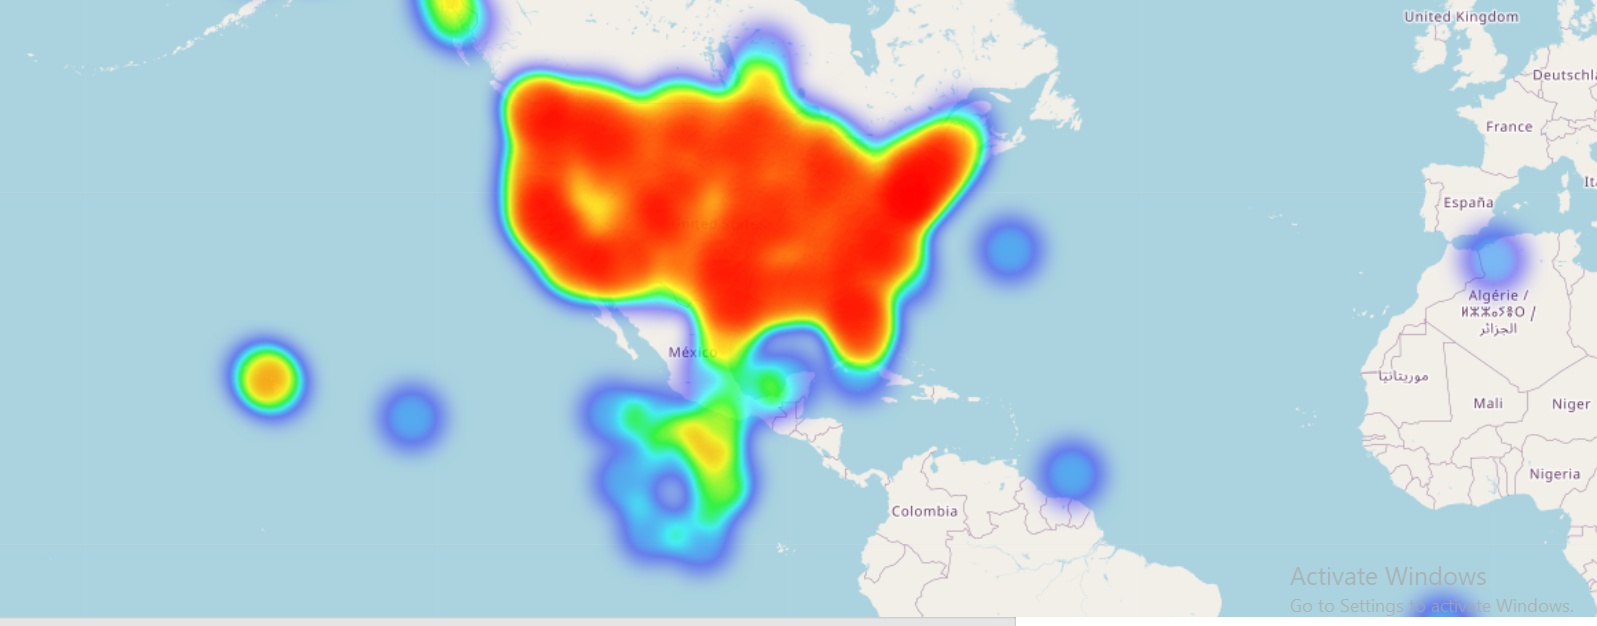

So we can see that the used cars market is quite active on the West Coast of US, and not so much on the East Coast. This may be due to a higher population and thus a higher number of cars in the region, or just the behaviour of the population that resides there to change cars frequently and thus buying and selling cars more often.

So if you want a great deal for your vehicle, chances are that you will get it in the West Coast region!

**Q7 : What all are the colours present and which is highest among them?**

In [ ]:
paint_color_df = used_car_df['paint_color'].value_counts()
paint_color_df

white     128813
black      56299
silver     38108
blue       27383
red        26148
grey       21716
custom      6062
brown       5940
green       5825
orange      1614
yellow      1515
purple       527
Name: paint_color, dtype: int64

## Using Plotly as a plotting backend for Pandas
We can configure Pandas to use Plotly as the backend for the plot methods of Pandas data frames & series. You can learn more about this here: https://plotly.com/python/pandas-backend/.

The Plotly backend can be enabled as follows:

In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
paint_color_df.plot(kind='area',  
                    title="Types of colors of the cars present in the Market",
                    labels = {
                    "index": "Colors",
                     "value": "Counts"})

We Can Have a clear idea that white color cars are the most demanding in the second hand market and black is the 2nd choice for the people and people are very less often to buy color like purple, yellow and orange so the chances of getting the cars of these colors is very rare.

**Q8 : Total number of states and having highest and lowest number of car manufacturer?**

In [ ]:
All_car_manufacturer_states = used_car_df.state.value_counts()
All_car_manufacturer_states

ca    39391
fl    21771
tx    16322
ny    14855
or    13804
oh    13793
wa    11480
nc    11209
pa    10820
mi    10410
va     8836
co     8462
tn     8140
wi     8116
id     7362
il     7211
nj     7152
az     6732
ma     6420
ia     5861
ga     5433
mn     5211
ok     4883
mt     4717
sc     4631
ks     4586
in     4201
md     3864
ct     3835
al     3500
ky     3325
mo     3249
nm     3087
ak     3055
dc     2545
nv     2468
ar     2396
nh     2168
hi     2128
la     2000
me     1858
vt     1835
ri     1557
ut      920
wv      865
sd      813
ne      669
de      628
ms      615
wy      430
nd      331
Name: state, dtype: int64

In [ ]:
fig = px.line(All_car_manufacturer_states)

In [ ]:
# Set axis & legend labels
fig.update_layout(
    title="Manufacturer States with highest and lowest manufacture units of cars",
    xaxis_title= 'Name of States',
    yaxis_title="Manufacturing Units",
    legend_title="manufacturer",
    plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)



This is the view of the states which has the highest and lowest manufacturer of cars.

States like california has the most demand of the used cars but the state like North Dakota has very less units of used cars this might be because of less population in that area so their is also very less chances of getting used cars within a short period of time.

**Q9 : Number of Car With the Number of Cylinder?**


In [ ]:
used_car_df['cylinders'].value_counts()

unknown         108359
6 cylinders      81581
4 cylinders      66834
8 cylinders      59331
5 cylinders       1381
10 cylinders      1106
other              741
3 cylinders        511
12 cylinders       106
Name: cylinders, dtype: int64

In [ ]:
px.histogram(used_car_df, x="cylinders", title='Number of Cars with Number of cylinders ')

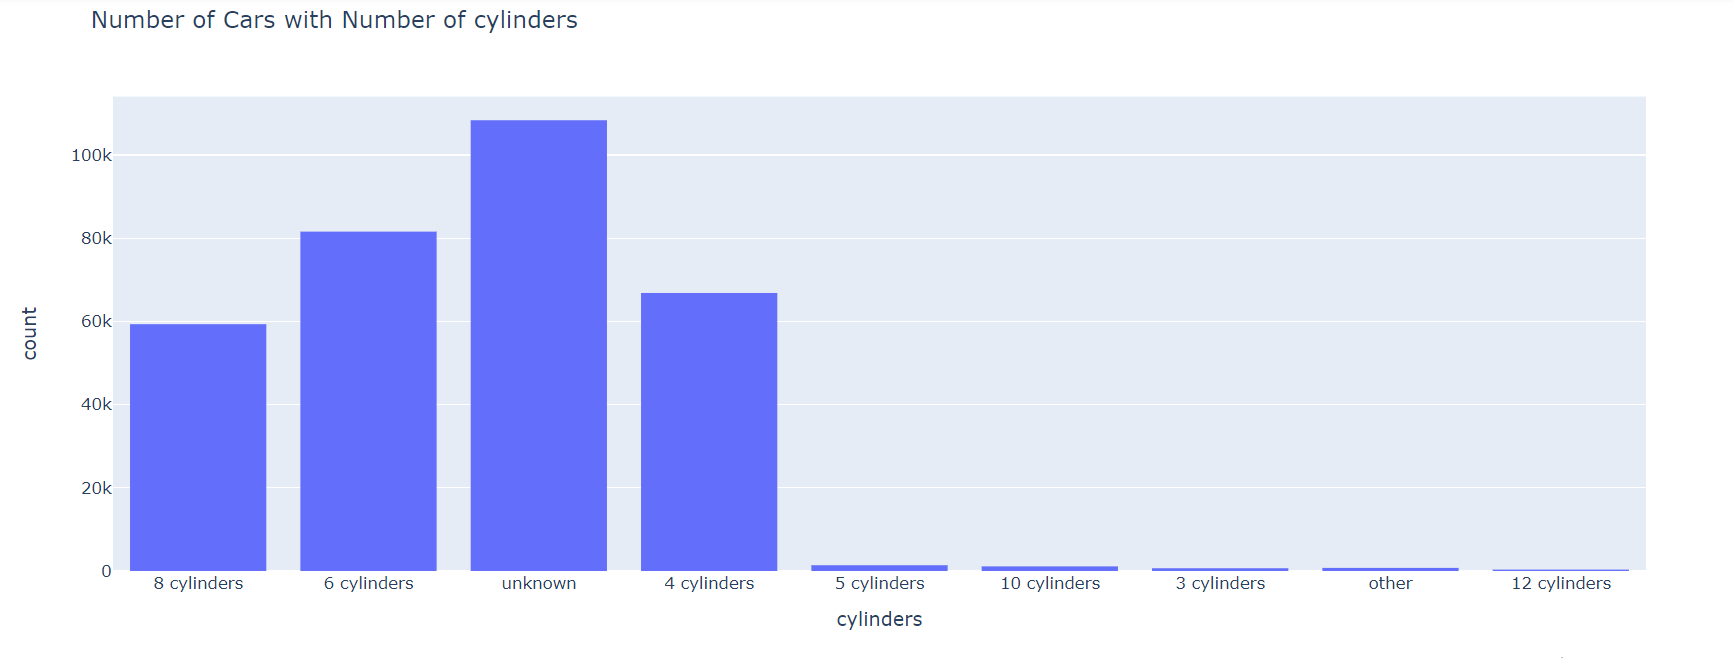

Here we can see that we have a lot of values as unknown and also 6 cylinder cars are the higest among all the types of cylinder in the cars so from this we can see that people are more frequently buying the cars with 6 cylinders also the unknown values which we have can be of any type such as 6 cylinder,4 cylinder, 8 cylinder etc. but we can get the insights from the graph is 12 cylinder or 3 cylinder cars are very rare this might be because people are less interested to buy those cars or peope are getting everything they want in other types.



**Q10 : Condition of the car with the number of cars?**

In [ ]:
fig = px.line(used_car_df['condition'].value_counts())

In [ ]:
# Set axis & legend labels
fig.update_layout(
    title="Number of cars with their condition",
    xaxis_title="Condition",
    yaxis_title="Count",
    legend_title="condition",
    plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)

# Start the Y axis from 0
fig.update_yaxes(rangemode='tozero')

Here we can see that maximum cars in the second hand market have good condtions, so don't have to think much on this aspect before buying a new car also we can see that cars having new conditions or salage are very less.

**Q11 :Which Car Manufacturer has Highest odometer readings?**

In [ ]:
used_car_df['odometer'].nlargest(12)          # Here we have taken the top 12 cars with the highest odometer readings.

21495     10000000.0
25801     10000000.0
32770     10000000.0
110977    10000000.0
115906    10000000.0
145046    10000000.0
155790    10000000.0
193583    10000000.0
194522    10000000.0
199191    10000000.0
227407    10000000.0
884        9999999.0
Name: odometer, dtype: float32

In [ ]:
df= used_car_df.loc[[21495,25801,32770,110977,115906,145046,155790,193583,194522,199191,227407,884], ['odometer', 'manufacturer']]
df

,odometer,manufacturer
21495,10000000.0,chevrolet
25801,10000000.0,chevrolet
32770,10000000.0,porsche
110977,10000000.0,ford
115906,10000000.0,ford
145046,10000000.0,chevrolet
155790,10000000.0,chevrolet
193583,10000000.0,jeep
194522,10000000.0,ford
199191,10000000.0,volvo


In [ ]:
fig = px.bar(df, x='manufacturer', y='odometer',color="manufacturer",title="Cars with highest number of odometer readings")
fig.show()

Here we can see that chevrolet cars are the highest which are runnig upto 1lakh kilometer and more.

So we can predict that chevrolet cars are the best in terms of kilometers, also the other compaines are their which can run upto 1lakh kilometers but they are very less in terms of number as compared to chevrolet.

**Q12 : which is the most top 10 expensive second hand car.**

In [ ]:
used_car_df.price.nlargest(10)

30224     32759.0
43816     32759.0
43915     32759.0
43947     32759.0
44046     32759.0
44740     32759.0
49097     32759.0
305481    32754.0
308567    32754.0
46284     32750.0
Name: price, dtype: float64

In [ ]:
df= used_car_df.loc[[30224,43816,43915,43947,44046,44740,49097,305481,308567,46284], ['price', 'manufacturer']]
df

,price,manufacturer
30224,32759.0,volvo
43816,32759.0,volvo
43915,32759.0,volvo
43947,32759.0,volvo
44046,32759.0,volvo
44740,32759.0,volvo
49097,32759.0,jeep
305481,32754.0,toyota
308567,32754.0,toyota
46284,32750.0,toyota


In [ ]:
fig = px.bar(df, x='manufacturer', y='price',color="manufacturer", title = "Most Expensive Second Hand Car")
fig.show()

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## **Inferences and Conclusion From The Exploratory Analysis**



Here are the conclusions that we could draw about the Used Cars Market in US from our analysis : 

1. There is a huge market of second and cars in US and still it is increasing very rapidly.

2. There are a lots of factors on which the buying of a car depends we need to go throgh each and every aspect before buying the car.

3. Majorly the conditions of the cars are good we don't have to worry on this aspect.

4. In the states like california we will easily get a senond hand car because the market of califonia for second hand car is too high.

5. white and black cars are the most common cars which we can easily get in the us market.

6. Most of the cars are 4WD which can directly impant on the milage of the car, if we want higher milage then we need to avoid taking 4WD cars.

7. If we are looking for a Sedan or Suv we can easily get but if we want vehicle like bus or offroad then we need to search a lot for that.


## **Future Work**





We can now work forward to explore this data more and more to fetch meaningful information out of it.

With all the insights , and further analysis into the data, we can have answers to a lot of questions like -
- we can develop a machine learning model which can automaticall detect the best car for us.
- we can work for a model which can tell us the cheapest cars with the best features.



## **Refences**




* Dataset Used : [Used Cars Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)
* Opendatsets library: https://github.com/JovianML/opendatasets 
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* Pandas to deal with dataframe: https://pandas.pydata.org/
* Numpy to deal wit numeric computing : https://numpy.org/
* Visualization Library : [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), [Plotly](https://plotly.com/).
* Stack Overflow to clarify some of the doubts : https://stackoverflow.com/

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
